# FordGoBike Dataset Finding 
## by Saron Tessera 

## Investigation Overview

> Lyft has provided the data system for public to download. Each trip is includes:Trip Duration (seconds), Start Time and Date,End Time and Date, Start Station ID ,Start Station Name, Start Station Latitude Start Station Longitude, End Station ID ,End Station Name ,End Station Latitude, End Station Longitude, Bike ID, User Type, (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual), Member Year of Birth,Member Gender. In the following work, we will wrangle, assess, store, and visualize our findings.

> In this presentation, I will show the different patter of members by gender, user type and duration

## Dataset Overview

> The Dataset contains 94802 rows and 16 columns.The dataset is tidy and very easy to understand. From the 16 columns the members_geneder and members_birth_year seems to have null values. The data point i chose is recoded is in Juanuary 2018. The datapoint are the start time, end time, station longitude and latitude, bike id, user type, member year of birth and gender

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('fordgo_master.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration

> This visualization helps us undertand how long it will take for the ride. we can see that an average a trip will fall upto 10min ride.
> In the second visualization, we can also see the traffic of bike ride in different Hours. we see that the peak hours are between 8am to 10 am and 5pm to 6pm

Text(0, 0.5, 'Frequency')

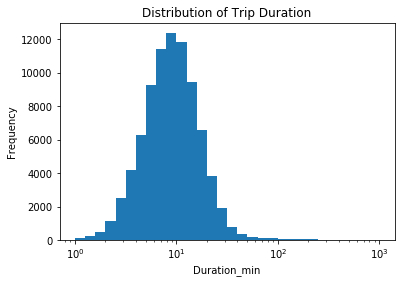

In [3]:
#In order to understand the information, We will change the duration from sec to min 
df_clean['duration_min'] = df_clean['duration_sec'] / 60
df_clean.drop('duration_sec' , axis = 1 , inplace = True)

#Plot the hist 
bin_edges = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_clean , x = 'duration_min' , bins = bin_edges);
plt.xticks(ticks,labels);
plt.xlabel('Duration_min');
plt.xscale('log');
plt.title('Distribution of Trip Duration')
plt.ylabel('Frequency')

Text(0.5, 1.03, 'Hourly bike rides')

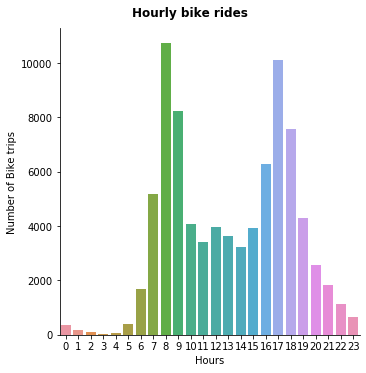

In [6]:
gr= sns.catplot(data=df_clean,x='start_time_hour', kind= 'count')
gr.set_axis_labels('Hours', 'Number of Bike trips')
gr.fig.suptitle('Hourly bike rides', y=1.03, fontsize=12,fontweight='bold')

## Hourly usage by user type

>This is intresting finding. The next graph shows intresting trend. the customers and subscriber peak hours for renting starts at 8am but the difference here is the customer still continous to be high but for the subscriber, it sinks down between 10 till 4 pm. And picks back up at 5 pm. This leads to hypothesis that the subscriber are the members who use these system daily for work or school. Where as the customer could be vistors.

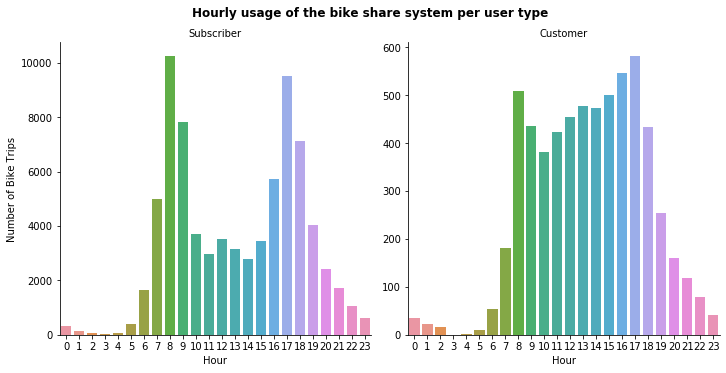

In [7]:
gr = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False)
gr.set_axis_labels("Hour", "Number of Bike Trips")
gr.set_titles("{col_name}")
gr.fig.suptitle('Hourly usage of the bike per user type', y=1.03, fontsize=12, fontweight='semibold');

## Usage of bike by User type and gender 
> The next two visualization introduce the different variable like gender, and user type and bike trips. Eventhough we can see that there are more male rider for the subscribers, for the customers, its not significantly different 



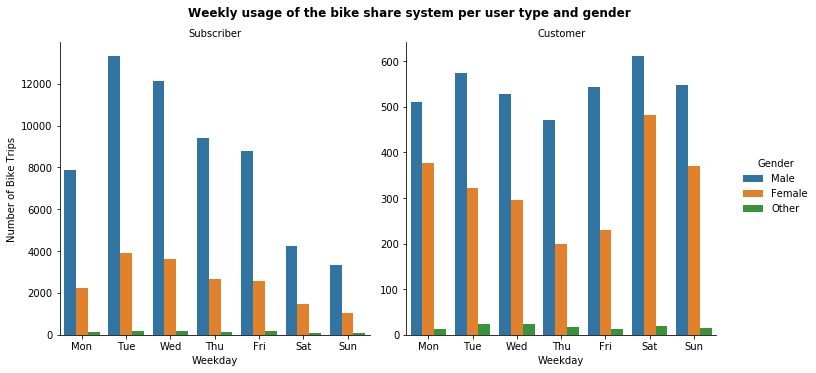

In [8]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
gr = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
gr.set_axis_labels("Weekday", "Number of Bike Trips")
gr._legend.set_title('Gender')
gr.set_titles("{col_name}")
gr.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=12, fontweight='semibold');

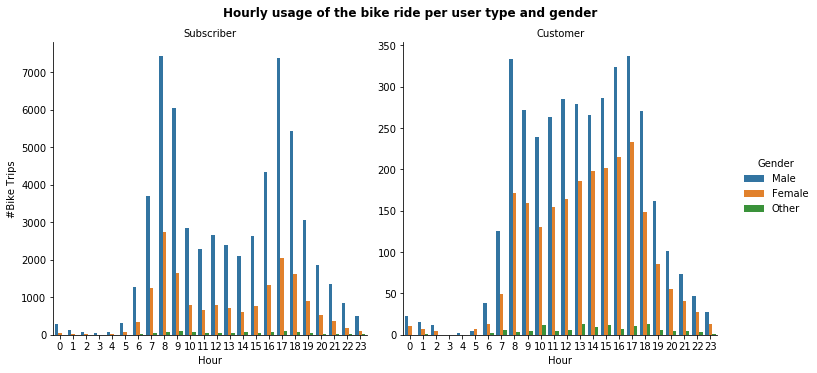

In [9]:
# hourly usege of the bike sharing system per user type and gender

gr = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
gr.set_axis_labels("Hour", "#Bike Trips")
gr._legend.set_title('Gender')
gr.set_titles("{col_name}")
gr.fig.suptitle('Hourly usage of the bike ride per user type and gender', y=1.03, fontsize=12, fontweight='semibold');


> > `jupyter nbconvert <fordGoBike_exploration_slidedeck>.ipynb --to slides --post serve --template output_toggle`
